In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

# Loading the multiple datasets

In [13]:
data_path = './data'
file_list = os.listdir(data_path)

for file in file_list:
    print('*'*10, file, '*'*10)
    file_data = pd.read_csv(os.path.join(data_path, file))
    print('{} has {} rows and {} columns'.format(file, 
                                                 file_data.shape[0], 
                                                 file_data.shape[1]))
    
    print(file_data.head())
    del file_data # Avoid memory problems

********** building_metadata.csv **********
building_metadata.csv has 1449 rows and 6 columns
   site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN
********** sample_submission.csv **********
sample_submission.csv has 41697600 rows and 2 columns
   row_id  meter_reading
0       0              0
1       1              0
2       2              0
3       3              0
4       4              0
********** test.csv **********
test.csv has 41697600 rows and 4 columns
   row_id  building_id  meter            timestamp
0       0            0      0  2017-01-01 00:00:00
1       1            1      0  2017-01-0

We have $20216100$ entries in our train data vs $41697600$ entries in our test data. 

The *weather_train* data is paired with *train* by the variables *site\_id* and *timestamp*, as well, those datasets are paired with *building_metadata* by *site_id*, *building_id*, and *year_built*.

# Study of building_metadata

In [14]:
file_path = './data/building_metadata.csv'
building_metadata = pd.read_csv(file_path)
building_metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [16]:
building_metadata.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [26]:
for column in building_metadata.columns:
    print('{} has {} different values and has {} Na values.'.format(column, 
                                                                    len(building_metadata[column].unique()),
                                                                    np.sum(building_metadata[column].isna())))

site_id has 16 different values and has 0 Na values.
building_id has 1449 different values and has 0 Na values.
primary_use has 16 different values and has 0 Na values.
square_feet has 1397 different values and has 0 Na values.
year_built has 117 different values and has 774 Na values.
floor_count has 19 different values and has 1094 Na values.


As we sucpect for the describe, *year_built* and *floor_count* have 774 and 1094 Na values respectively.

## site_id

In [39]:
building_metadata.site_id.value_counts()

3     274
13    154
2     135
15    124
9     124
0     105
14    102
4      91
5      89
8      70
1      51
6      44
12     36
10     30
7      15
11      5
Name: site_id, dtype: int64

## primary_use

In [38]:
building_metadata.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

## square_feet

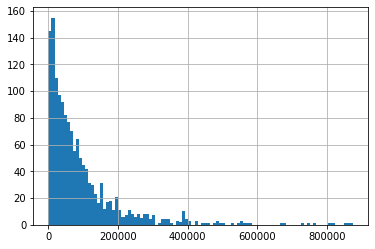

In [40]:
building_metadata.square_feet.hist(bins = 100)
plt.show()

Looks like an exponential distribution

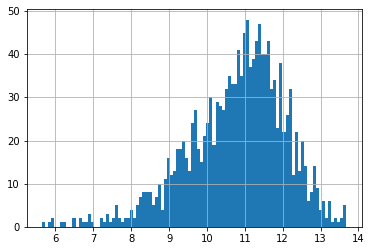

In [42]:
square_feet_log = np.log(building_metadata.square_feet)
square_feet_log.hist(bins = 100)
plt.show()

$log(x+1)$ looks better

## year_built

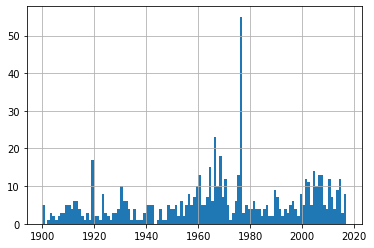

In [35]:
building_metadata.year_built.hist(bins = building_metadata.year_built.unique().shape[0])
plt.show()

#### NaNs in year_built

We need to imput the Na values of the variable *year_built*, using the mean of each area, but we need to know earlier how many companies we have without year in our dataset

In [56]:
building_metadata['year_na'] = building_metadata.year_built.isna()
building_metadata['ones'] = 1
building_metadata[['site_id', 'year_na', 'ones']].groupby('site_id').sum()

,year_na,ones
site_id,,
0,0.0,105
1,11.0,51
2,41.0,135
3,142.0,274
4,2.0,91
5,1.0,89
6,44.0,44
7,1.0,15
8,70.0,70


We have several areas where any of is companies have a value in *year_built*

## floor_count

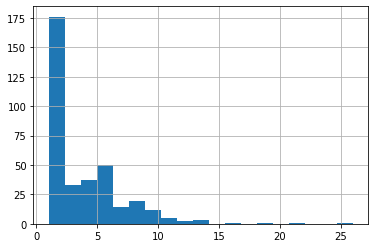

In [36]:
building_metadata.floor_count.hist(bins = building_metadata.floor_count.unique().shape[0])
plt.show()

## square_feet per floor

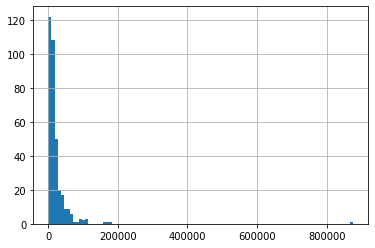

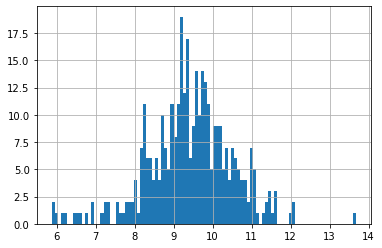

In [43]:
floor_count = building_metadata.floor_count
square_feet = building_metadata.square_feet
square_feet_per_floor = square_feet/floor_count
square_feet_per_floor_log = np.log(square_feet_per_floor)

square_feet_per_floor.hist(bins = 100)
plt.show()

square_feet_per_floor_log.hist(bins = 100)
plt.show()

# Weather Train dataset study

# Train dataset study

In [57]:
file_path = './data/train.csv'
train = pd.read_csv(file_path)
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


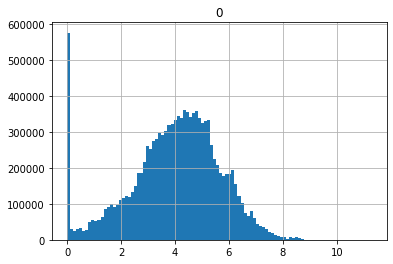

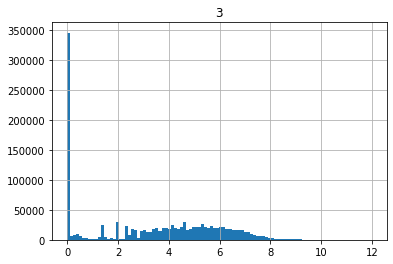

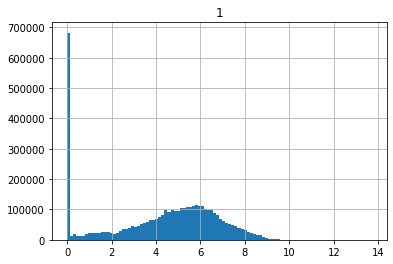

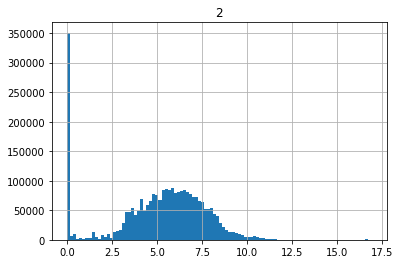

In [64]:
for i in train.meter.unique():
    data = np.log(train.loc[train.meter == i, 'meter_reading']+1)
    data.hist(bins = 100)
    plt.title(i)
    plt.show()

In [70]:
print('Aproximately, the {:.2f}% of the meter_reading values are 0'.format(100*np.sum(train.meter_reading == 0)/len(train.meter_reading)))

Aproximately, the 9.27% of the meter_reading values are 0


We have a problem here, because those 0 are noise for our future model. We will need to remove them because we need to predict how much energy uses the building (Maybe those 0 are measured when the buildings are closed).

# Joining train.csv and weather_train.csv

In [34]:
building_metadata.year_built.unique().shape[0]

117